In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading the dataset from the link to the dataset
url='https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv'
df=pd.read_csv(url)
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [4]:
#checking for null values
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [5]:
df['VisitFrequency'].nunique()

6

In [6]:
#encoding categorical variables
categorical=['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting','Gender','VisitFrequency']

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical:
    df[i]=le.fit_transform(df[i])

In [8]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,3,1


In [9]:
df['Like'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1453 entries, 0 to 1452
Series name: Like
Non-Null Count  Dtype 
--------------  ----- 
1453 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


In [10]:
#cleaning 'Like' column
rating=[]
for i in df['Like']:
    l=len(i)
    i=i[l-2:]
    rating.append(i)

In [11]:
df['Like']=rating

In [12]:
df['Like']=df['Like'].astype(int)
df['Like'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1453 entries, 0 to 1452
Series name: Like
Non-Null Count  Dtype
--------------  -----
1453 non-null   int32
dtypes: int32(1)
memory usage: 5.8 KB


In [13]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,3,1


C:\Users\NIVAS\AppData\Local\Programs\Python\Python39\Scripts\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


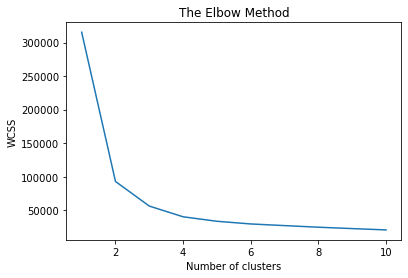

In [14]:
#wcss to determine number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
#kmeans clustering
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df)

In [16]:
y_kmeans

array([0, 0, 0, ..., 0, 1, 1])

In [17]:
#metrics
from sklearn.metrics import silhouette_score
silhouette_score(df, kmeans.labels_, metric='euclidean')

0.567831663586819

In [18]:
df['k-means cluster']=y_kmeans

In [19]:
df['k-means cluster'].value_counts()

0    767
1    686
Name: k-means cluster, dtype: int64

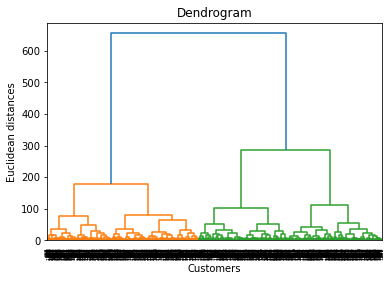

In [20]:
#dendogram to determine number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [21]:
#hierarchical clustering 
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(df)

In [22]:
y_hc

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [23]:
#metrics
from sklearn.metrics import silhouette_score
silhouette_score(df, kmeans.labels_, metric='euclidean')

0.5684399253289497

In [24]:
df['h cluster']=y_hc

In [25]:
df['h cluster'].value_counts()

0    797
1    656
Name: h cluster, dtype: int64